Задание 3* реализовал в алгоритме "подбора" альфы, в алгоритм 2 его встраивать не имело смысла, т.к. необходимые значения уже найдены. Условие прекращения np.abs(err_last - err) < eps, настраивается изменением значения eps. 


In [50]:


import numpy as np
import matplotlib.pyplot as plt


In [51]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [52]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [53]:
test_alpha = []
test_iterations = []
err_last = 1e+10 # Инициализация переменной для хранения предыдущего значения функции потерь
eps = 1e-5 # Точность
for alpha in np.linspace(1e-4, 0.115, 100): # Перебираем скорость градиентного спуска
    W = np.array([1, 0.5])
    for i in range(10000):
      y_pred = np.dot(W, X)
      err = calc_mse(y, y_pred)
      for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/len(y) * 2 * np.sum(X[ii] * (y_pred - y)))
#       if i % 1000 == 0:
#         print(i, W, err)
      if i == 9999: # Если достигнули конца i
        # print(f"Reached 10000 iterations. Alpha {alpha} Lost: {err}, Previous lost: {err_last}")
        # print(i, W, err)
        # print("*" * 50)
        break
      if np.abs(err_last - err) < eps: # Если изменение значения функции потерь меньше точности
        # print(f"Reached stability value of lost function on {i} iteration. Alpha {alpha}, lost: {err}")
        # print(i, W, err)
        # print("*" * 50)
        break
        
      err_last = err
    test_alpha.append(alpha)
    test_iterations.append(i)
        

C:\Users\vladimir\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\vladimir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
C:\Users\vladimir\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


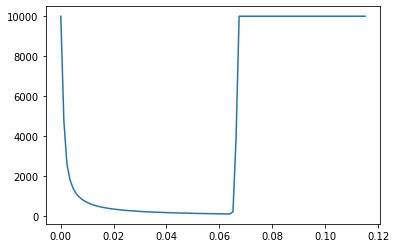

In [54]:
plt.plot(test_alpha, test_iterations)

Подобный метод перебора будет неэффективен на больших выборках но для этой задачи подошёл отлично.
Перебрав различные значения скорости спуска, было обнаружено, что при незначительном увеличении значения альфа
cкорость сходимости алгоритма сильно вырастает при изменени от 0.001 до 0.007, далее изменяется не так быстро и при значении 0.0639 достигает своего минимума, сходимость достигается за 192 итерации. Далее происходит резкое увеличение числа итераций из-за того, что при больших альфа алгоритм не может достигнуть экстремума, проскакивает мимо него. При значениях выше 0.06741 сходимость за условный максимум количества итераций (10000) не происходит.
Оптимальным будет значаение 0.061 и количество итераций 200 (для этого набора и для точности 1e-9. 
С понижением точности количество итераций незначительно уменьшается.

In [55]:
W = np. array([47.2321422 ,  3.91071213])


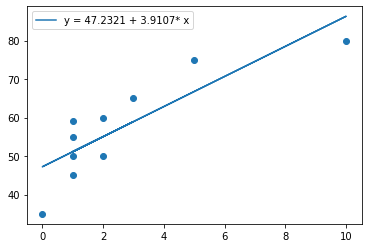

In [56]:
plt.scatter(X[1,:], y)
plt.plot(X[1], W[0] + W[1] * X[1], label=f'y = {W[0]:.4f} + {W[1]:.4f}* x')
plt.legend()


In [57]:
n = X.shape[1]
alpha = 0.061
W = np.array([1, 0.5])
for i in range(201):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1  ))) # Добавлено axis=1 в сумме, чтобы получить 2 измерения
  if i % 100 == 0:
    print(i, W, err)
W

0 [ 7.7222 21.24  ] 3173.15
100 [47.17323831  3.92159172] 45.939626611300376
200 [47.23205885  3.9107298 ] 45.937500004325656


array([47.23205885,  3.9107298 ])